# Analysis of Varience

Import modules

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
np.random.seed(1)

Load data 

In [3]:
df = pd.read_excel('Aov.xlsx',sheet_name= 2)
df.head(3)

,Cat,Flavor,Eaten
0,Fluffy,Kidney,2.37
1,Puffy,Kidney,2.62
2,Scampers,Kidney,2.31


In [4]:
df.isna().sum()

Cat       0
Flavor    0
Eaten     0
dtype: int64

In [5]:
df.describe()

,Eaten
count,60.000000
mean,2.195333
std,0.448559
min,1.080000
25%,1.937500
50%,2.260000
75%,2.455000
max,3.000000


## Exploratory Data Analysis


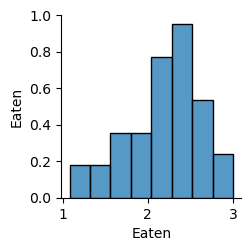

In [6]:
sns.pairplot(df)

## Encoding

In [7]:
df.head(3)

,Cat,Flavor,Eaten
0,Fluffy,Kidney,2.37
1,Puffy,Kidney,2.62
2,Scampers,Kidney,2.31


In [8]:
df = df.join(pd.get_dummies(df['Flavor'],prefix= 'Flavor'))
df = df.join(pd.get_dummies(df['Cat'],prefix= 'Cat'))

In [9]:
df.head(3)

,Cat,Flavor,Eaten,Flavor_Beef,Flavor_Chicken,Flavor_Kidney,Flavor_Salmon,Flavor_Shrimp,Cat_Apollonia,Cat_Bacon,Cat_Ethel,Cat_Fluffy,Cat_Itty-Bitty,Cat_Lucy,Cat_Mr. Smooches,Cat_Pandora,Cat_Pork Chop,Cat_Puffy,Cat_Sangria,Cat_Scampers
0,Fluffy,Kidney,2.37,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Puffy,Kidney,2.62,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Scampers,Kidney,2.31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Variables X and Y


In [10]:
X = df.drop(['Eaten','Flavor','Cat'],axis=1)
Y = df['Eaten']

In [11]:
FEG = df.groupby('Cat')['Eaten'].var().reset_index()
FEG

,Cat,Eaten
0,Apollonia,0.02685
1,Bacon,0.10485
2,Ethel,0.17127
3,Fluffy,0.05320
4,Itty-Bitty,0.04157
5,Lucy,0.16502
6,Mr. Smooches,0.01087
7,Pandora,0.10145
8,Pork Chop,0.24348
9,Puffy,0.10842


### Subsetting

In [16]:
df_sm = df[df['Cat']=='Mr. Smooches']
df_ib = df[df['Cat']=='Itty-Bitty']
df_pc = df[df['Cat']=='Pork Chop']

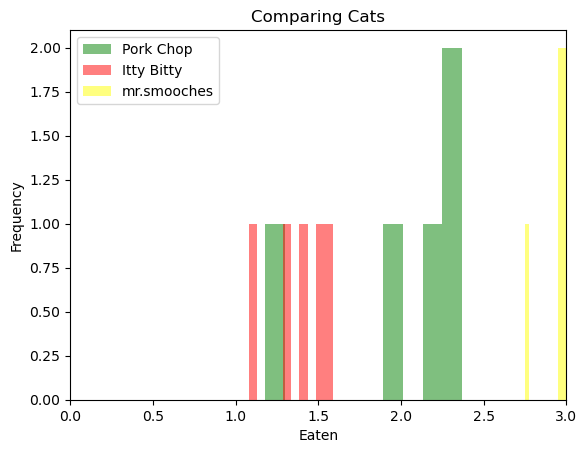

In [21]:
plt.hist(df_pc['Eaten'], color='green', alpha=0.5, label='Pork Chop', bins=10)
plt.hist(df_ib['Eaten'], color='red', alpha=0.5, label='Itty Bitty', bins=10)
plt.hist(df_sm['Eaten'], color='yellow', alpha=0.5, label='mr.smooches', bins=10)
plt.xlim(0, 3)
plt.title('Comparing Cats')
plt.xlabel('Eaten')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## levene test

To determine whether two or more features have equal variances

In [20]:
import scipy.stats as stats

levene_results = []
for i in X.columns:
    result = stats.levene(X[:][i], Y, center='median')
    print("X[{}]: {}".format(i, result))
    levene_results.append(result)

X[Flavor_Beef]: LeveneResult(statistic=4.380170508367544, pvalue=0.03850209556743033)
X[Flavor_Chicken]: LeveneResult(statistic=4.380170508367545, pvalue=0.03850209556743033)
X[Flavor_Kidney]: LeveneResult(statistic=4.380170508367545, pvalue=0.03850209556743033)
X[Flavor_Salmon]: LeveneResult(statistic=4.380170508367545, pvalue=0.03850209556743033)
X[Flavor_Shrimp]: LeveneResult(statistic=4.380170508367545, pvalue=0.03850209556743033)
X[Cat_Apollonia]: LeveneResult(statistic=22.75522374434129, pvalue=5.312543362552446e-06)
X[Cat_Bacon]: LeveneResult(statistic=22.75522374434129, pvalue=5.312543362552446e-06)
X[Cat_Ethel]: LeveneResult(statistic=22.75522374434129, pvalue=5.312543362552446e-06)
X[Cat_Fluffy]: LeveneResult(statistic=22.75522374434129, pvalue=5.312543362552446e-06)
X[Cat_Itty-Bitty]: LeveneResult(statistic=22.75522374434129, pvalue=5.312543362552446e-06)
X[Cat_Lucy]: LeveneResult(statistic=22.75522374434129, pvalue=5.312543362552446e-06)
X[Cat_Mr. Smooches]: LeveneResult(st

Since the p-value is relatively high (greater than the typical significance level of 0.05) for Flavours and very less for cats , this suggests that the eating preference is majorly based on flavours but not the cat.We can also infer that there is not enough evidence to conclude that the variances of the groups (flavors and cats)are significantly different.

## Analysis Of varience test

A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): (It implies that the means of all the population are equal)


    H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Eaten ~ Cat + Flavor + Cat:Flavor', data=df).fit()
summary = model.summary()

print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Eaten   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 May 2023   Prob (F-statistic):                nan
Time:                        01:03:20   Log-Likelihood:                 1930.0
No. Observations:                  60   AIC:                            -3740.
Df Residuals:                       0   BIC:                            -3614.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\mukes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\mukes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\mukes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In conclusion, based on the provided p-values, all flavors (Beef, Chicken, Kidney, Salmon, Shrimp) have coefficients that are statistically significant in predicting the outcome variable.

## Tukey_HSD test

Using Tukey HSD to test for differences between groups

In [30]:
import statsmodels.stats.multicomp as mc
for i in X.columns:
    comp = mc.MultiComparison(X[:][i],Y)
    post_hoc_res = comp.tukeyhsd()
    print("X[{}]: {}".format(i, post_hoc_res.pvalues.mean()))


c:\Users\mukes\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
c:\Users\mukes\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


X[Flavor_Beef]: nan
X[Flavor_Chicken]: 0.9992960586652285
X[Flavor_Kidney]: 0.9976921194906108
X[Flavor_Salmon]: 0.9536700364230031
X[Flavor_Shrimp]: 0.9999931346348494
X[Cat_Apollonia]: 0.99972277849883
X[Cat_Bacon]: 0.8858487547905217
X[Cat_Ethel]: 0.9845629651008339
X[Cat_Fluffy]: 0.9906176561496134
X[Cat_Itty-Bitty]: nan
X[Cat_Lucy]: 0.9845629651008339
X[Cat_Mr. Smooches]: nan
X[Cat_Pandora]: 0.9845629651008339
X[Cat_Pork Chop]: 0.997638576568923
X[Cat_Puffy]: 0.8858487547905216
X[Cat_Sangria]: 0.9297852273862243
X[Cat_Scampers]: 0.9749810345673767
